# Install

In [71]:
#!pip install xgboost scikit-learn pandas numpy

# Imports

In [72]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Dataset

In [73]:
df = pd.read_csv('..\models\df_balanced_full.csv', low_memory=False)
display(df)

,subject_id,value_chartevent,valuenum_chartevent,valueuom_chartevent,label_chartevent,category,time_since_admission_chartevent,icd_code,admission_type,insurance,race,admission_location,age,value_labevent,valuenum_labevent,valueuom_labevent,priority,time_since_admission_labevent
0,10014078,103,103.0,°F,Temperature Fahrenheit,Routine Vital Signs,4.850000,2724,EW EMER.,Medicaid,UNABLE TO OBTAIN,EMERGENCY ROOM,60,-3,-3.0,mEq/L,Unknown,12.316667
1,10011398,25,25.0,mEq/L,TCO2 (calc) Arterial,Labs,7.900000,2724,SURGICAL SAME DAY ADMISSION,Other,HISPANIC OR LATINO,PHYSICIAN REFERRAL,67,1.4,1.4,Unknown,STAT,4.150000
2,10011398,25,25.0,mA,Temporary Ventricular Stim Setting mA,Cardiovascular (Pacer Data),16.750000,2724,SURGICAL SAME DAY ADMISSION,Other,HISPANIC OR LATINO,PHYSICIAN REFERRAL,67,384,384.0,mm Hg,Unknown,5.616667
3,10011398,36.8,36.8,°C,Temperature Celsius,Routine Vital Signs,18.750000,2724,SURGICAL SAME DAY ADMISSION,Other,HISPANIC OR LATINO,PHYSICIAN REFERRAL,67,98,98.0,%,Unknown,6.666667
4,10023771,100,100.0,%,O2 saturation pulseoxymetry,Respiratory,22.750000,2724,ELECTIVE,Medicare,WHITE,PHYSICIAN REFERRAL,70,1.2,1.2,Unknown,ROUTINE,15.366667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49249,10023117,104,104.0,mg/dL,Glucose (serum),Labs,9.050000,Z87891,OBSERVATION ADMIT,Medicare,WHITE,EMERGENCY ROOM,58,2,2.0,Unknown,STAT,2.666667
49250,10019003,Obeys Commands,6.0,Unknown,GCS - Motor Response,Neurological,1.600000,Z87891,EW EMER.,Other,WHITE,TRANSFER FROM HOSPITAL,72,1.1,1.1,mg/dL,STAT,6.000000
49251,10023117,No response,1.0,Unknown,GCS - Motor Response,Neurological,4.950000,Z87891,OBSERVATION ADMIT,Medicare,WHITE,TRANSFER FROM HOSPITAL,58,___,133.0,mEq/L,STAT,2.566667
49252,10037861,No movement,0.0,Unknown,Strength L Arm,Neurological,23.433333,Z87891,EW EMER.,Medicare,UNKNOWN,EMERGENCY ROOM,79,21,21.0,mg/dL,STAT,9.183333


In [74]:
df.describe()

,subject_id,valuenum_chartevent,time_since_admission_chartevent,age,valuenum_labevent,time_since_admission_labevent
count,4.925400e+04,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000
mean,1.002327e+07,64.377868,11.649927,62.735189,108.838101,9.071760
std,9.687942e+03,689.927564,6.909472,14.341153,1418.442488,7.985474
min,1.000122e+07,-23.000000,-1.800000,29.000000,-21.000000,-20.300000
25%,1.001808e+07,1.840000,5.616667,56.000000,3.800000,3.850000
50%,1.002312e+07,18.000000,11.416667,63.000000,15.000000,9.016667
75%,1.002929e+07,83.000000,17.400000,72.000000,48.000000,15.233333
max,1.004002e+07,62656.000000,24.000000,91.000000,62656.000000,23.983333


In [75]:
df.describe(exclude=np.number)

,value_chartevent,valueuom_chartevent,label_chartevent,category,icd_code,admission_type,insurance,race,admission_location,value_labevent,valueuom_labevent,priority
count,49254,49254,49254,49254,49254,49254,49254,49254,49254,49254,49254,49254
unique,1077,34,362,22,6,6,3,9,7,1044,29,3
top,1,Unknown,Heart Rate,Routine Vital Signs,2724,EW EMER.,Other,WHITE,EMERGENCY ROOM,___,mEq/L,STAT
freq,3893,17903,2482,11152,8209,25601,24221,37442,20280,4762,10605,23997


In [76]:
df.drop(['subject_id'], axis=1)

,value_chartevent,valuenum_chartevent,valueuom_chartevent,label_chartevent,category,time_since_admission_chartevent,icd_code,admission_type,insurance,race,admission_location,age,value_labevent,valuenum_labevent,valueuom_labevent,priority,time_since_admission_labevent
0,103,103.0,°F,Temperature Fahrenheit,Routine Vital Signs,4.850000,2724,EW EMER.,Medicaid,UNABLE TO OBTAIN,EMERGENCY ROOM,60,-3,-3.0,mEq/L,Unknown,12.316667
1,25,25.0,mEq/L,TCO2 (calc) Arterial,Labs,7.900000,2724,SURGICAL SAME DAY ADMISSION,Other,HISPANIC OR LATINO,PHYSICIAN REFERRAL,67,1.4,1.4,Unknown,STAT,4.150000
2,25,25.0,mA,Temporary Ventricular Stim Setting mA,Cardiovascular (Pacer Data),16.750000,2724,SURGICAL SAME DAY ADMISSION,Other,HISPANIC OR LATINO,PHYSICIAN REFERRAL,67,384,384.0,mm Hg,Unknown,5.616667
3,36.8,36.8,°C,Temperature Celsius,Routine Vital Signs,18.750000,2724,SURGICAL SAME DAY ADMISSION,Other,HISPANIC OR LATINO,PHYSICIAN REFERRAL,67,98,98.0,%,Unknown,6.666667
4,100,100.0,%,O2 saturation pulseoxymetry,Respiratory,22.750000,2724,ELECTIVE,Medicare,WHITE,PHYSICIAN REFERRAL,70,1.2,1.2,Unknown,ROUTINE,15.366667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49249,104,104.0,mg/dL,Glucose (serum),Labs,9.050000,Z87891,OBSERVATION ADMIT,Medicare,WHITE,EMERGENCY ROOM,58,2,2.0,Unknown,STAT,2.666667
49250,Obeys Commands,6.0,Unknown,GCS - Motor Response,Neurological,1.600000,Z87891,EW EMER.,Other,WHITE,TRANSFER FROM HOSPITAL,72,1.1,1.1,mg/dL,STAT,6.000000
49251,No response,1.0,Unknown,GCS - Motor Response,Neurological,4.950000,Z87891,OBSERVATION ADMIT,Medicare,WHITE,TRANSFER FROM HOSPITAL,58,___,133.0,mEq/L,STAT,2.566667
49252,No movement,0.0,Unknown,Strength L Arm,Neurological,23.433333,Z87891,EW EMER.,Medicare,UNKNOWN,EMERGENCY ROOM,79,21,21.0,mg/dL,STAT,9.183333


# Treatment

In [77]:
df['value_labevent'] = df['value_labevent'].fillna('Unknown')


In [78]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
print(pd.DataFrame({"Missing": missing, "Percent (%)": missing_percent}))

                                 Missing  Percent (%)
subject_id                             0          0.0
value_chartevent                       0          0.0
valuenum_chartevent                    0          0.0
valueuom_chartevent                    0          0.0
label_chartevent                       0          0.0
category                               0          0.0
time_since_admission_chartevent        0          0.0
icd_code                               0          0.0
admission_type                         0          0.0
insurance                              0          0.0
race                                   0          0.0
admission_location                     0          0.0
age                                    0          0.0
value_labevent                         0          0.0
valuenum_labevent                      0          0.0
valueuom_labevent                      0          0.0
priority                               0          0.0
time_since_admission_labeven

In [79]:
df[['icd_code', 'valuenum_chartevent']].groupby('icd_code').count()


,valuenum_chartevent
icd_code,
2724,8209
4019,8209
E039,8209
E785,8209
Z794,8209
Z87891,8209


In [80]:
df[['icd_code', 'valuenum_chartevent']].groupby('icd_code').nunique()


,valuenum_chartevent
icd_code,
2724,509
4019,518
E039,464
E785,517
Z794,345
Z87891,464


In [81]:
df['valuenum_chartevent'].describe()


count    49254.000000
mean        64.377868
std        689.927564
min        -23.000000
25%          1.840000
50%         18.000000
75%         83.000000
max      62656.000000
Name: valuenum_chartevent, dtype: float64

c:\Users\catar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


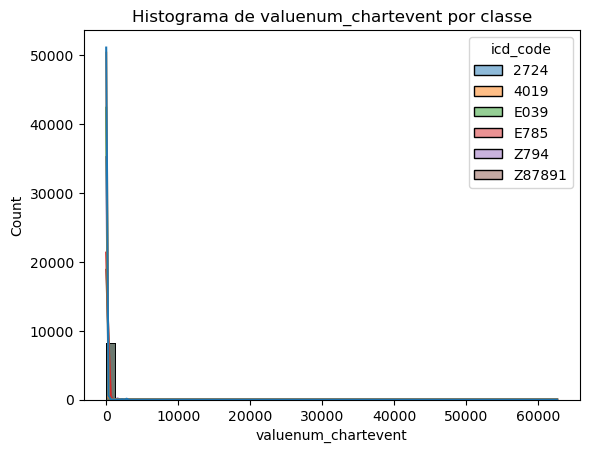

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='valuenum_chartevent', hue='icd_code', kde=True, bins=50)
plt.title("Histograma de valuenum_chartevent por classe")
plt.show()

<Axes: xlabel='icd_code', ylabel='valuenum_chartevent'>

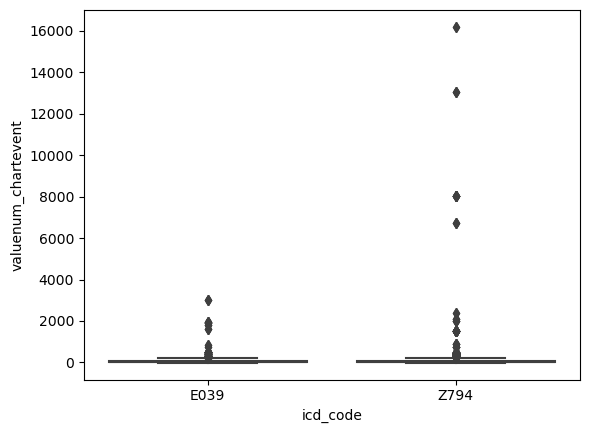

In [83]:
sns.boxplot(data=df[df['icd_code'].isin(['E039', 'Z794'])], x='icd_code', y='valuenum_chartevent')



# Outliers

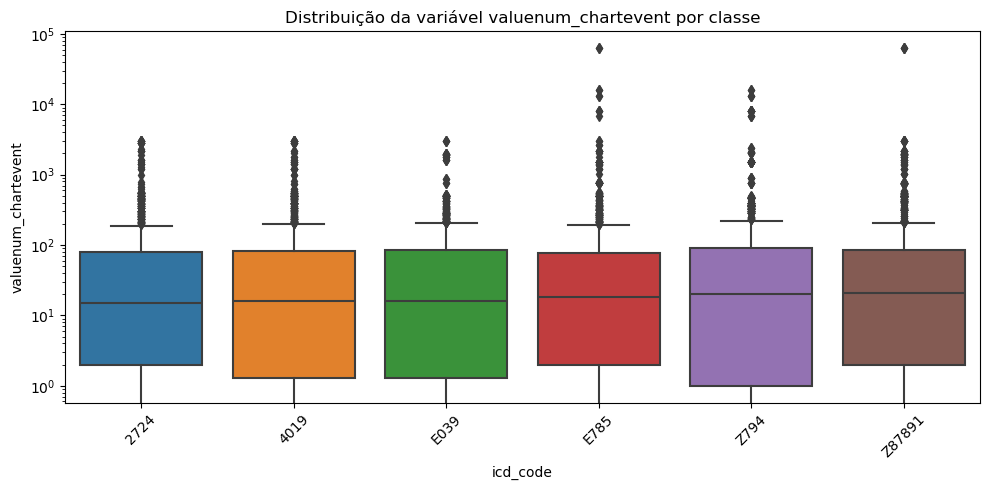

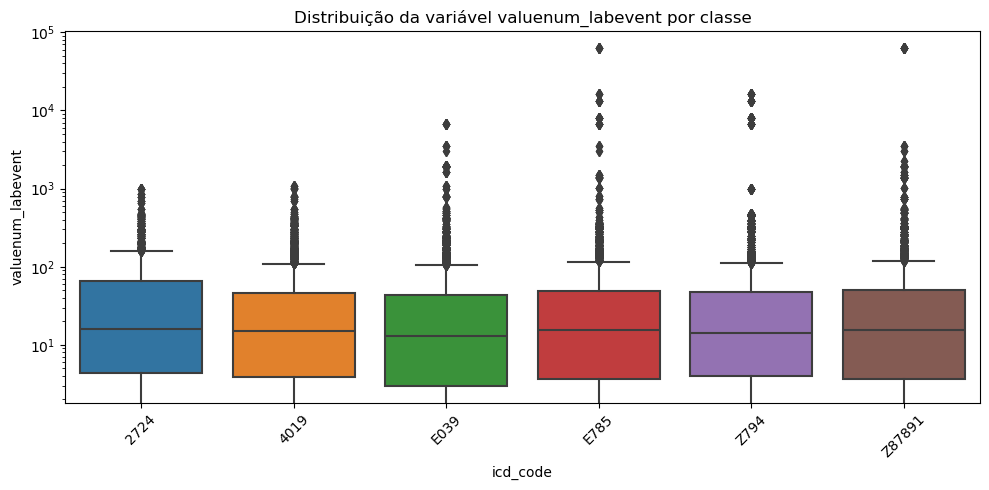

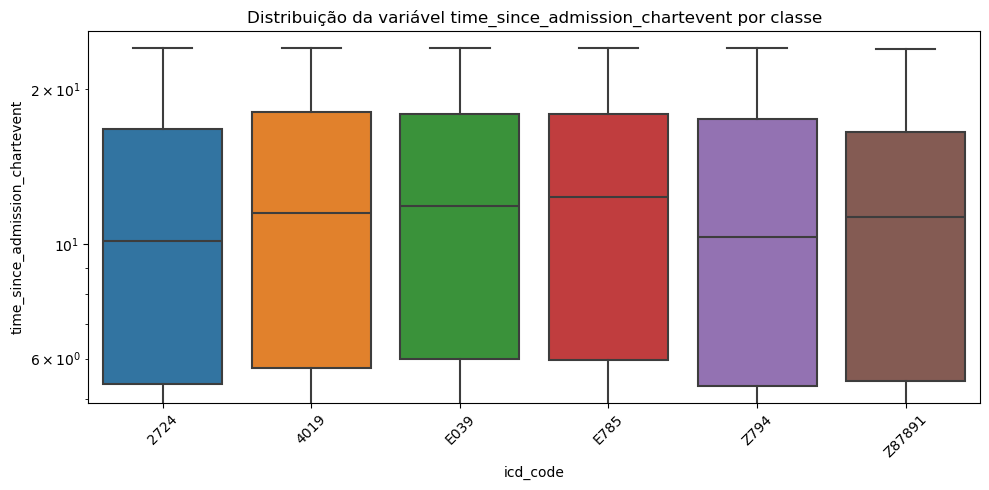

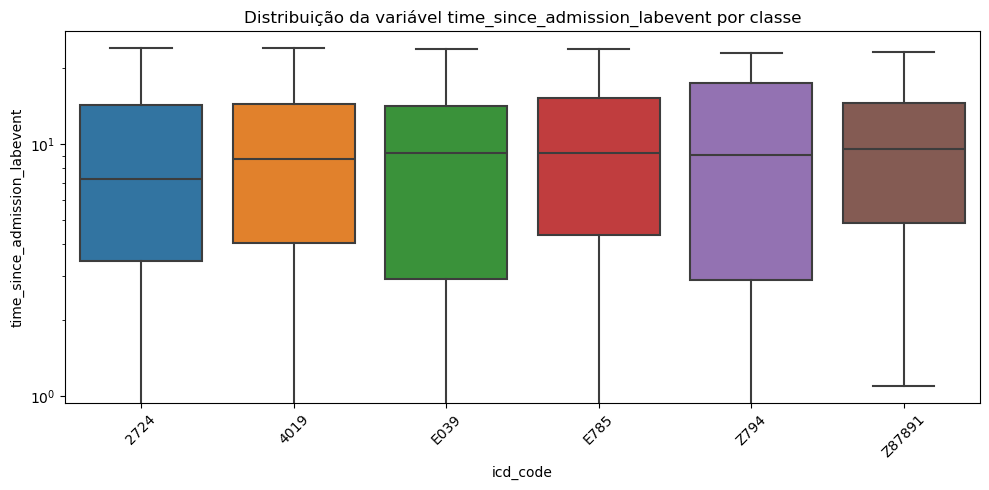

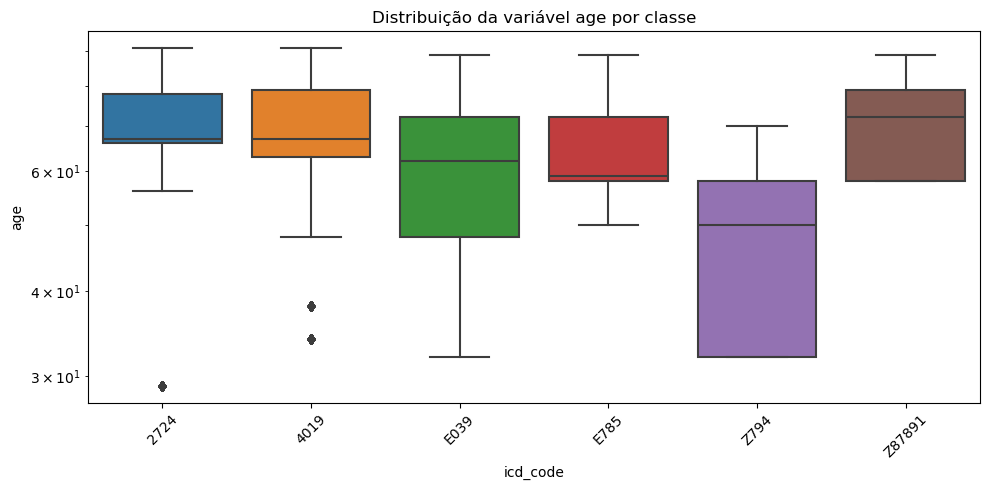

In [84]:
numerical_cols = [
    'valuenum_chartevent', 'valuenum_labevent',
    'time_since_admission_chartevent', 'time_since_admission_labevent', 'age'
]

import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='icd_code', y=col, data=df)
    plt.yscale('log')
    plt.xticks(rotation=45)
    plt.title(f'Distribuição da variável {col} por classe')
    plt.tight_layout()
    plt.show()

# XGBoost DMatrix

In [85]:
# Extract feature and target arrays
X = df.drop('icd_code', axis=1)
y = df['icd_code']

In [86]:

le = LabelEncoder()
y_encoded = le.fit_transform(y)

y = y_encoded

In [87]:
# Extract text features
cats = X.select_dtypes(exclude=np.number).columns.tolist()

# Convert to Pandas category
for col in cats:
   X[col] = X[col].astype('category')

In [88]:
print(X.dtypes)

subject_id                            int64
value_chartevent                   category
valuenum_chartevent                 float64
valueuom_chartevent                category
label_chartevent                   category
category                           category
time_since_admission_chartevent     float64
admission_type                     category
insurance                          category
race                               category
admission_location                 category
age                                   int64
value_labevent                     category
valuenum_labevent                   float64
valueuom_labevent                  category
priority                           category
time_since_admission_labevent       float64
dtype: object


In [89]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, y_test, enable_categorical=True)

# Model

In [91]:
params = {
    'max_depth': 8,
    'eta': 0.5,
    'objective': 'multi:softprob',  # para classificação multi-classe
    'num_class': len(le.classes_),  # número de doenças diferentes
    'eval_metric': 'merror',      # métrica de avaliação or mlogloss
    'tree_method': 'hist',
    'subsample':0.8,  
    'colsample_bytree':0.8,         
    'seed': 42                      
}

In [92]:
n = 100
model = xgb.train(
   params=params,
    dtrain=dtrain,
    num_boost_round=500,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=20,
    verbose_eval=10
)

[0]	train-merror:0.30592	test-merror:0.38869
[10]	train-merror:0.15661	test-merror:0.37346
[20]	train-merror:0.06900	test-merror:0.37539
[21]	train-merror:0.06258	test-merror:0.37600


In [93]:
preds = model.predict(dtest)
y_pred = preds.argmax(axis=1)

from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics


print("Acuraccy:", accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred, target_names=le.classes_))


Acuraccy: 0.6205461374479748
Precision: 0.6133608120507071
Recall: 0.6205461374479748
              precision    recall  f1-score   support

        2724       0.70      0.73      0.71      1678
        4019       0.70      0.66      0.68      1582
        E039       0.59      0.58      0.59      1595
        E785       0.49      0.37      0.42      1735
        Z794       0.72      0.86      0.78      1618
      Z87891       0.49      0.53      0.51      1643

    accuracy                           0.62      9851
   macro avg       0.61      0.62      0.62      9851
weighted avg       0.61      0.62      0.61      9851



# Feature Engeneering

In [94]:
df2 = pd.read_csv('..\models\df_balanced_full.csv', low_memory=False)
display(df)

,subject_id,value_chartevent,valuenum_chartevent,valueuom_chartevent,label_chartevent,category,time_since_admission_chartevent,icd_code,admission_type,insurance,race,admission_location,age,value_labevent,valuenum_labevent,valueuom_labevent,priority,time_since_admission_labevent
0,10014078,103,103.0,°F,Temperature Fahrenheit,Routine Vital Signs,4.850000,2724,EW EMER.,Medicaid,UNABLE TO OBTAIN,EMERGENCY ROOM,60,-3,-3.0,mEq/L,Unknown,12.316667
1,10011398,25,25.0,mEq/L,TCO2 (calc) Arterial,Labs,7.900000,2724,SURGICAL SAME DAY ADMISSION,Other,HISPANIC OR LATINO,PHYSICIAN REFERRAL,67,1.4,1.4,Unknown,STAT,4.150000
2,10011398,25,25.0,mA,Temporary Ventricular Stim Setting mA,Cardiovascular (Pacer Data),16.750000,2724,SURGICAL SAME DAY ADMISSION,Other,HISPANIC OR LATINO,PHYSICIAN REFERRAL,67,384,384.0,mm Hg,Unknown,5.616667
3,10011398,36.8,36.8,°C,Temperature Celsius,Routine Vital Signs,18.750000,2724,SURGICAL SAME DAY ADMISSION,Other,HISPANIC OR LATINO,PHYSICIAN REFERRAL,67,98,98.0,%,Unknown,6.666667
4,10023771,100,100.0,%,O2 saturation pulseoxymetry,Respiratory,22.750000,2724,ELECTIVE,Medicare,WHITE,PHYSICIAN REFERRAL,70,1.2,1.2,Unknown,ROUTINE,15.366667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49249,10023117,104,104.0,mg/dL,Glucose (serum),Labs,9.050000,Z87891,OBSERVATION ADMIT,Medicare,WHITE,EMERGENCY ROOM,58,2,2.0,Unknown,STAT,2.666667
49250,10019003,Obeys Commands,6.0,Unknown,GCS - Motor Response,Neurological,1.600000,Z87891,EW EMER.,Other,WHITE,TRANSFER FROM HOSPITAL,72,1.1,1.1,mg/dL,STAT,6.000000
49251,10023117,No response,1.0,Unknown,GCS - Motor Response,Neurological,4.950000,Z87891,OBSERVATION ADMIT,Medicare,WHITE,TRANSFER FROM HOSPITAL,58,___,133.0,mEq/L,STAT,2.566667
49252,10037861,No movement,0.0,Unknown,Strength L Arm,Neurological,23.433333,Z87891,EW EMER.,Medicare,UNKNOWN,EMERGENCY ROOM,79,21,21.0,mg/dL,STAT,9.183333


## Combine columns

In [95]:
df2['combined'] = np.where(
    (df2['valueuom_chartevent'] == 'Unknown'),
    df2['label_chartevent'],
    df2['label_chartevent'] + ' (' + df2['valueuom_chartevent'] + ')'
)

display(df2)

,subject_id,value_chartevent,valuenum_chartevent,valueuom_chartevent,label_chartevent,category,time_since_admission_chartevent,icd_code,admission_type,insurance,race,admission_location,age,value_labevent,valuenum_labevent,valueuom_labevent,priority,time_since_admission_labevent,combined
0,10014078,103,103.0,°F,Temperature Fahrenheit,Routine Vital Signs,4.850000,2724,EW EMER.,Medicaid,UNABLE TO OBTAIN,EMERGENCY ROOM,60,-3,-3.0,mEq/L,Unknown,12.316667,Temperature Fahrenheit (°F)
1,10011398,25,25.0,mEq/L,TCO2 (calc) Arterial,Labs,7.900000,2724,SURGICAL SAME DAY ADMISSION,Other,HISPANIC OR LATINO,PHYSICIAN REFERRAL,67,1.4,1.4,Unknown,STAT,4.150000,TCO2 (calc) Arterial (mEq/L)
2,10011398,25,25.0,mA,Temporary Ventricular Stim Setting mA,Cardiovascular (Pacer Data),16.750000,2724,SURGICAL SAME DAY ADMISSION,Other,HISPANIC OR LATINO,PHYSICIAN REFERRAL,67,384,384.0,mm Hg,Unknown,5.616667,Temporary Ventricular Stim Setting mA (mA)
3,10011398,36.8,36.8,°C,Temperature Celsius,Routine Vital Signs,18.750000,2724,SURGICAL SAME DAY ADMISSION,Other,HISPANIC OR LATINO,PHYSICIAN REFERRAL,67,98,98.0,%,Unknown,6.666667,Temperature Celsius (°C)
4,10023771,100,100.0,%,O2 saturation pulseoxymetry,Respiratory,22.750000,2724,ELECTIVE,Medicare,WHITE,PHYSICIAN REFERRAL,70,1.2,1.2,Unknown,ROUTINE,15.366667,O2 saturation pulseoxymetry (%)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49249,10023117,104,104.0,mg/dL,Glucose (serum),Labs,9.050000,Z87891,OBSERVATION ADMIT,Medicare,WHITE,EMERGENCY ROOM,58,2,2.0,Unknown,STAT,2.666667,Glucose (serum) (mg/dL)
49250,10019003,Obeys Commands,6.0,Unknown,GCS - Motor Response,Neurological,1.600000,Z87891,EW EMER.,Other,WHITE,TRANSFER FROM HOSPITAL,72,1.1,1.1,mg/dL,STAT,6.000000,GCS - Motor Response
49251,10023117,No response,1.0,Unknown,GCS - Motor Response,Neurological,4.950000,Z87891,OBSERVATION ADMIT,Medicare,WHITE,TRANSFER FROM HOSPITAL,58,___,133.0,mEq/L,STAT,2.566667,GCS - Motor Response
49252,10037861,No movement,0.0,Unknown,Strength L Arm,Neurological,23.433333,Z87891,EW EMER.,Medicare,UNKNOWN,EMERGENCY ROOM,79,21,21.0,mg/dL,STAT,9.183333,Strength L Arm


In [96]:
df2.drop(['valueuom_chartevent','label_chartevent'], axis=1)

,subject_id,value_chartevent,valuenum_chartevent,category,time_since_admission_chartevent,icd_code,admission_type,insurance,race,admission_location,age,value_labevent,valuenum_labevent,valueuom_labevent,priority,time_since_admission_labevent,combined
0,10014078,103,103.0,Routine Vital Signs,4.850000,2724,EW EMER.,Medicaid,UNABLE TO OBTAIN,EMERGENCY ROOM,60,-3,-3.0,mEq/L,Unknown,12.316667,Temperature Fahrenheit (°F)
1,10011398,25,25.0,Labs,7.900000,2724,SURGICAL SAME DAY ADMISSION,Other,HISPANIC OR LATINO,PHYSICIAN REFERRAL,67,1.4,1.4,Unknown,STAT,4.150000,TCO2 (calc) Arterial (mEq/L)
2,10011398,25,25.0,Cardiovascular (Pacer Data),16.750000,2724,SURGICAL SAME DAY ADMISSION,Other,HISPANIC OR LATINO,PHYSICIAN REFERRAL,67,384,384.0,mm Hg,Unknown,5.616667,Temporary Ventricular Stim Setting mA (mA)
3,10011398,36.8,36.8,Routine Vital Signs,18.750000,2724,SURGICAL SAME DAY ADMISSION,Other,HISPANIC OR LATINO,PHYSICIAN REFERRAL,67,98,98.0,%,Unknown,6.666667,Temperature Celsius (°C)
4,10023771,100,100.0,Respiratory,22.750000,2724,ELECTIVE,Medicare,WHITE,PHYSICIAN REFERRAL,70,1.2,1.2,Unknown,ROUTINE,15.366667,O2 saturation pulseoxymetry (%)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49249,10023117,104,104.0,Labs,9.050000,Z87891,OBSERVATION ADMIT,Medicare,WHITE,EMERGENCY ROOM,58,2,2.0,Unknown,STAT,2.666667,Glucose (serum) (mg/dL)
49250,10019003,Obeys Commands,6.0,Neurological,1.600000,Z87891,EW EMER.,Other,WHITE,TRANSFER FROM HOSPITAL,72,1.1,1.1,mg/dL,STAT,6.000000,GCS - Motor Response
49251,10023117,No response,1.0,Neurological,4.950000,Z87891,OBSERVATION ADMIT,Medicare,WHITE,TRANSFER FROM HOSPITAL,58,___,133.0,mEq/L,STAT,2.566667,GCS - Motor Response
49252,10037861,No movement,0.0,Neurological,23.433333,Z87891,EW EMER.,Medicare,UNKNOWN,EMERGENCY ROOM,79,21,21.0,mg/dL,STAT,9.183333,Strength L Arm


In [97]:
df2.drop(['valueuom_labevent'], axis=1)

,subject_id,value_chartevent,valuenum_chartevent,valueuom_chartevent,label_chartevent,category,time_since_admission_chartevent,icd_code,admission_type,insurance,race,admission_location,age,value_labevent,valuenum_labevent,priority,time_since_admission_labevent,combined
0,10014078,103,103.0,°F,Temperature Fahrenheit,Routine Vital Signs,4.850000,2724,EW EMER.,Medicaid,UNABLE TO OBTAIN,EMERGENCY ROOM,60,-3,-3.0,Unknown,12.316667,Temperature Fahrenheit (°F)
1,10011398,25,25.0,mEq/L,TCO2 (calc) Arterial,Labs,7.900000,2724,SURGICAL SAME DAY ADMISSION,Other,HISPANIC OR LATINO,PHYSICIAN REFERRAL,67,1.4,1.4,STAT,4.150000,TCO2 (calc) Arterial (mEq/L)
2,10011398,25,25.0,mA,Temporary Ventricular Stim Setting mA,Cardiovascular (Pacer Data),16.750000,2724,SURGICAL SAME DAY ADMISSION,Other,HISPANIC OR LATINO,PHYSICIAN REFERRAL,67,384,384.0,Unknown,5.616667,Temporary Ventricular Stim Setting mA (mA)
3,10011398,36.8,36.8,°C,Temperature Celsius,Routine Vital Signs,18.750000,2724,SURGICAL SAME DAY ADMISSION,Other,HISPANIC OR LATINO,PHYSICIAN REFERRAL,67,98,98.0,Unknown,6.666667,Temperature Celsius (°C)
4,10023771,100,100.0,%,O2 saturation pulseoxymetry,Respiratory,22.750000,2724,ELECTIVE,Medicare,WHITE,PHYSICIAN REFERRAL,70,1.2,1.2,ROUTINE,15.366667,O2 saturation pulseoxymetry (%)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49249,10023117,104,104.0,mg/dL,Glucose (serum),Labs,9.050000,Z87891,OBSERVATION ADMIT,Medicare,WHITE,EMERGENCY ROOM,58,2,2.0,STAT,2.666667,Glucose (serum) (mg/dL)
49250,10019003,Obeys Commands,6.0,Unknown,GCS - Motor Response,Neurological,1.600000,Z87891,EW EMER.,Other,WHITE,TRANSFER FROM HOSPITAL,72,1.1,1.1,STAT,6.000000,GCS - Motor Response
49251,10023117,No response,1.0,Unknown,GCS - Motor Response,Neurological,4.950000,Z87891,OBSERVATION ADMIT,Medicare,WHITE,TRANSFER FROM HOSPITAL,58,___,133.0,STAT,2.566667,GCS - Motor Response
49252,10037861,No movement,0.0,Unknown,Strength L Arm,Neurological,23.433333,Z87891,EW EMER.,Medicare,UNKNOWN,EMERGENCY ROOM,79,21,21.0,STAT,9.183333,Strength L Arm


# Feature Interaction

In [ ]:
#Admission Type x time_since_admission_labevent

# Local de Admissão × Prioridade do Exame

# Idade × Pressão Arterial

# Encoding Categorical Variables

## One Hot Encoding

In [49]:
unique_values = df['priority'].unique()
print(unique_values)


['Unknown' 'STAT' 'ROUTINE']


In [68]:
variables_cat = ['admission_type', 'insurance', 'priority']

In [69]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
one_hot_encoded = encoder.fit_transform(df2[variables_cat])

one_hot_df = pd.DataFrame(one_hot_encoded, 
                          columns=encoder.get_feature_names_out(variables_cat),
                          index=df2.index)

X_encoded = pd.concat([df2.drop(columns=variables_cat), one_hot_df], axis=1)

In [70]:
display(X_encoded)

,subject_id,value_chartevent,valuenum_chartevent,valueuom_chartevent,label_chartevent,category,time_since_admission_chartevent,icd_code,race,admission_location,...,admission_type_EW EMER.,admission_type_OBSERVATION ADMIT,admission_type_SURGICAL SAME DAY ADMISSION,admission_type_URGENT,insurance_Medicaid,insurance_Medicare,insurance_Other,priority_ROUTINE,priority_STAT,priority_Unknown
0,10014078,103,103.0,°F,Temperature Fahrenheit,Routine Vital Signs,4.850000,2724,UNABLE TO OBTAIN,EMERGENCY ROOM,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,10011398,25,25.0,mEq/L,TCO2 (calc) Arterial,Labs,7.900000,2724,HISPANIC OR LATINO,PHYSICIAN REFERRAL,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,10011398,25,25.0,mA,Temporary Ventricular Stim Setting mA,Cardiovascular (Pacer Data),16.750000,2724,HISPANIC OR LATINO,PHYSICIAN REFERRAL,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,10011398,36.8,36.8,°C,Temperature Celsius,Routine Vital Signs,18.750000,2724,HISPANIC OR LATINO,PHYSICIAN REFERRAL,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,10023771,100,100.0,%,O2 saturation pulseoxymetry,Respiratory,22.750000,2724,WHITE,PHYSICIAN REFERRAL,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49249,10023117,104,104.0,mg/dL,Glucose (serum),Labs,9.050000,Z87891,WHITE,EMERGENCY ROOM,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
49250,10019003,Obeys Commands,6.0,Unknown,GCS - Motor Response,Neurological,1.600000,Z87891,WHITE,TRANSFER FROM HOSPITAL,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
49251,10023117,No response,1.0,Unknown,GCS - Motor Response,Neurological,4.950000,Z87891,WHITE,TRANSFER FROM HOSPITAL,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
49252,10037861,No movement,0.0,Unknown,Strength L Arm,Neurological,23.433333,Z87891,UNKNOWN,EMERGENCY ROOM,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Label encoding

## Target Encoding

In [57]:
# Extract feature and target arrays
X_encoded = df
X = df.drop('icd_code', axis=1)
y = df['icd_code']

In [58]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

y = y_encoded

In [59]:
# Extract text features
cats = X.select_dtypes(exclude=np.number).columns.tolist()

# Convert to Pandas category
for col in cats:
   X[col] = X[col].astype('category')

In [60]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [62]:
params = {
    'max_depth': 6,
    'eta': 0.01,
    'objective': 'multi:softprob',  # para classificação multi-classe
    'num_class': len(le.classes_),  # número de doenças diferentes
    'eval_metric': 'mlogloss',      # métrica de avaliação or mlogloss
    'tree_method': 'hist',
    'subsample':0.8,  
    'colsample_bytree':0.8, 
    'min_child_weight': 1, 
    'gamma': 0.1,                         
    'seed': 42                      
}

In [63]:
n = 1000
model = xgb.train(
   params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=20,
    verbose_eval=10
)

[0]	train-mlogloss:1.77854	test-mlogloss:1.77964


[10]	train-mlogloss:1.65746	test-mlogloss:1.66651
[20]	train-mlogloss:1.55304	test-mlogloss:1.56905
[30]	train-mlogloss:1.46371	test-mlogloss:1.48605
[40]	train-mlogloss:1.38464	test-mlogloss:1.41350
[50]	train-mlogloss:1.31588	test-mlogloss:1.35089
[60]	train-mlogloss:1.25464	test-mlogloss:1.29476
[70]	train-mlogloss:1.19951	test-mlogloss:1.24488
[80]	train-mlogloss:1.15012	test-mlogloss:1.20025
[90]	train-mlogloss:1.10524	test-mlogloss:1.15963
[100]	train-mlogloss:1.06346	test-mlogloss:1.12188
[110]	train-mlogloss:1.02551	test-mlogloss:1.08768
[120]	train-mlogloss:0.99054	test-mlogloss:1.05607
[130]	train-mlogloss:0.95822	test-mlogloss:1.02661
[140]	train-mlogloss:0.92963	test-mlogloss:1.00117
[150]	train-mlogloss:0.90228	test-mlogloss:0.97670
[160]	train-mlogloss:0.87808	test-mlogloss:0.95553
[170]	train-mlogloss:0.85566	test-mlogloss:0.93600
[180]	train-mlogloss:0.83466	test-mlogloss:0.91762
[190]	train-mlogloss:0.81525	test-mlogloss:0.90042
[200]	train-mlogloss:0.79663	test-mloglo

In [64]:
preds = model.predict(dtest)
y_pred = preds.argmax(axis=1)

from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics


print("Acuraccy:", accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred, target_names=le.classes_))

Acuraccy: 0.6369911684092986
Precision: 0.6288177095404051
Recall: 0.6369911684092986
              precision    recall  f1-score   support

        2724       0.69      0.76      0.73      1678
        4019       0.72      0.64      0.68      1582
        E039       0.61      0.58      0.60      1595
        E785       0.54      0.33      0.41      1735
        Z794       0.71      0.94      0.81      1618
      Z87891       0.51      0.57      0.54      1643

    accuracy                           0.64      9851
   macro avg       0.63      0.64      0.63      9851
weighted avg       0.63      0.64      0.63      9851

